In [87]:
import numpy as np
import pandas as pd
import random as rand
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

df = pd.read_csv("../train.csv")

np.random.seed(0)

In [88]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].mean())
df["MasVnrType"] = df["MasVnrType"].fillna(df["MasVnrType"].mode()[rand.randint(0, len(pd.Series(['MasVnrType']).mode()) - 1)])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[rand.randint(0, len(pd.Series(df['Electrical']).mode()) - 1)])
df["LotFrontage"] = df["LotFrontage"].fillna(0)
df["Alley"] = df["Alley"].fillna("NoAlley")
df["BsmtQual"] = df["BsmtQual"].fillna("NoBasement")
df["BsmtCond"] = df["BsmtCond"].fillna("NoBasement")
df["BsmtExposure"] = df["BsmtExposure"].fillna("NoBasement")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NoBasement")
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NoBasement")
df["FireplaceQu"] = df["FireplaceQu"].fillna("NoFireplace")
df["GarageType"] = df["GarageType"].fillna("NoGarage")
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(-1)
df["GarageFinish"] = df["GarageFinish"].fillna("NoGarage")
df["GarageQual"] = df["GarageQual"].fillna("NoGarage")
df["GarageCond"] = df["GarageCond"].fillna("NoGarage")
df["PoolQC"] = df["PoolQC"].fillna("NoPool")
df["Fence"] = df["Fence"].fillna("NoFence")
df["MiscFeature"] = df["MiscFeature"].fillna("NoMiscFeature")

In [89]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through the categorical columns
for column in categorical_columns:
    # Convert all values to strings and then fit and transform the LabelEncoder
    df[column] = label_encoder.fit_transform(df[column].astype(str))

We're making a copy and splitting into feature and label

In [90]:
X = df.copy()
y = X.pop("SalePrice")

In [91]:
# Train and score baseline model
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")

MAE Baseline Score: 1.779e+04


In [92]:


X["TimeMode"] = X["YrSold"] + X["MoSold"]
X["TotalIndoorSF"] = X['TotalBsmtSF'] + X["1stFlrSF"] + X["2ndFlrSF"]
X["TotalSF"] = X['TotalBsmtSF'] + X["1stFlrSF"] + X["2ndFlrSF"]+ X['LotArea'] + X["MasVnrArea"] + X["GarageArea"] + X['WoodDeckSF'] + X["OpenPorchSF"] + X["EnclosedPorch"]+ X['3SsnPorch'] + X["ScreenPorch"] + X["PoolArea"]
X["TotalRms"] = X['TotRmsAbvGrd'] + X["BsmtFullBath"] + X["BsmtHalfBath"]

model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")

MAE Score with Ratio Features: 1.749e+04


In [93]:
improvement = baseline_score - score
print(improvement)

305.193075342464


KeyError: 'TimeMode'

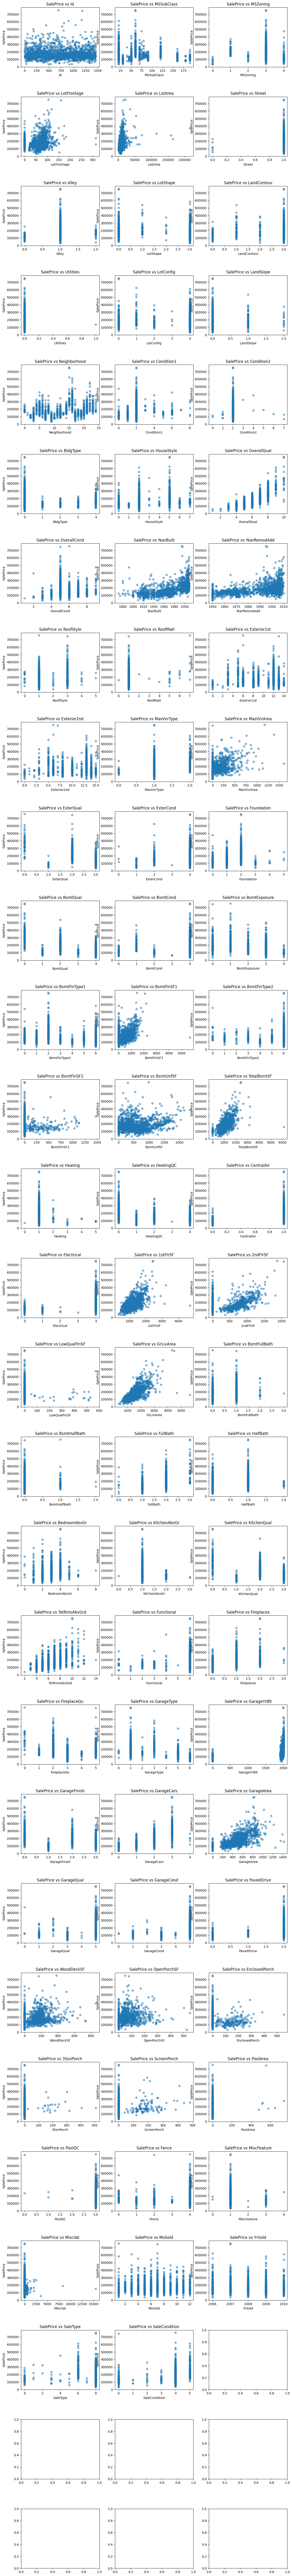

In [94]:
columns_to_plot = X.columns


num_plots = len(columns_to_plot)


num_cols = 3  # Number of columns in each row of subplots
num_rows = (num_plots + num_cols - 1) // num_cols  # Number of rows of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

fig.subplots_adjust(hspace=0.5)


# Iterate through columns and create scatter plots
for i, column in enumerate(columns_to_plot):
    row_num = i // num_cols
    col_num = i % num_cols
    ax = axes[row_num, col_num]
    ax.scatter(df[column], df['SalePrice'], alpha=0.5)
    ax.set_xlabel(column)
    ax.set_ylabel('SalePrice')
    ax.set_title(f'SalePrice vs {column}')

# Remove any empty subplots if the number of plots is not a multiple of num_cols
for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()